In [10]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hiroshima_challengedata.csv', header=None, names=['uid', 'd', 't', 'x', 'y'])
data = data[(data['x'] != 999) & (data['y'] != 999)]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-10-b7a898a9ae32>:7: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hiroshima_challengedata.csv', header=None, names=['uid', 'd', 't', 'x', 'y'])


### 找區塊

In [13]:
import seaborn as sns
from numpy import unravel_index
import numpy as np

pos_day = [[[0 for _ in range(75)] for _ in range(200)] for _ in range(200)]
different = [[0 for _ in range(200)] for _ in range(200)]
for i in range(20):
    data_i = data[(data['x']==i)]
    for j in range(20):
      data_ij = data_i[(data_i['y']==j)]
      for k in range(75):
        pos_day[i][j][k] = len(data_ij[(data_ij['d']==k)].index)
      min_day = min(pos_day[i][j])
      max_day = max(pos_day[i][j])
      different[i][j] = max_day-min_day
      print(i, j, 'done')

different_np = np.array(different)
target_pos = unravel_index(different_np.argmax(), different_np.shape)
print(target_pos)
plt.xlabel("x")
plt.ylabel("y")
sns.heatmap(different, cmap='coolwarm', cbar=True, xticklabels=10, yticklabels=10)
plt.show()

In [ ]:
import seaborn as sns
from numpy import unravel_index
import numpy as np

pos_day = [[[0 for _ in range(75)] for _ in range(200)] for _ in range(200)]
different = [[0 for _ in range(200)] for _ in range(200)]
for i in range(200):
    data_i = data[(data['x']==i)]
    for j in range(200):
      data_ij = data_i[(data_i['y']==j)]
      for k in range(75):
        pos_day[i][j][k] = len(data_ij[(data_ij['d']==k)].index)
      min_day = min(pos_day[i][j])
      max_day = max(pos_day[i][j])
      different[i][j] = max_day-min_day
      print(i, j, 'done')

串流輸出內容已截斷至最後 5000 行。
175 0 done
175 1 done
175 2 done
175 3 done
175 4 done
175 5 done
175 6 done
175 7 done
175 8 done
175 9 done
175 10 done
175 11 done
175 12 done
175 13 done
175 14 done
175 15 done
175 16 done
175 17 done
175 18 done
175 19 done
175 20 done
175 21 done
175 22 done
175 23 done
175 24 done
175 25 done
175 26 done
175 27 done
175 28 done
175 29 done
175 30 done
175 31 done
175 32 done
175 33 done
175 34 done
175 35 done
175 36 done
175 37 done
175 38 done
175 39 done
175 40 done
175 41 done
175 42 done
175 43 done
175 44 done
175 45 done
175 46 done
175 47 done
175 48 done
175 49 done
175 50 done
175 51 done
175 52 done
175 53 done
175 54 done
175 55 done
175 56 done
175 57 done
175 58 done
175 59 done
175 60 done
175 61 done
175 62 done
175 63 done
175 64 done
175 65 done
175 66 done
175 67 done
175 68 done
175 69 done
175 70 done
175 71 done
175 72 done
175 73 done
175 74 done
175 75 done
175 76 done
175 77 done
175 78 done
175 79 done
175 80 done
175 81 done
175 8

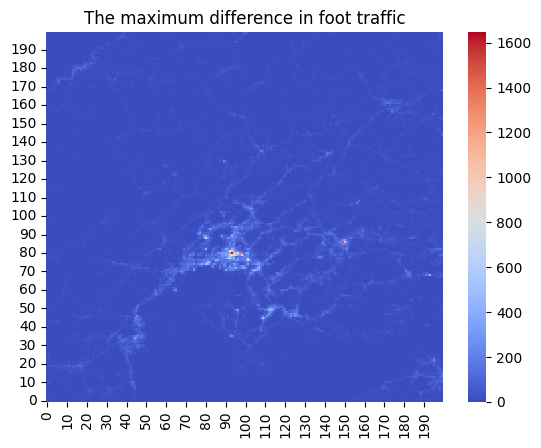

In [ ]:
'''
for i in range(80, 90):
  for j in range (145, 155):
    print(i, j,different[i][j])
different_np = np.array(different)
target_pos = unravel_index(different_np.argmax(), different_np.shape)
print(target_pos)
'''
plt.xlabel("x")
plt.ylabel("y")
plt.title('The maximum difference in foot traffic')
sns.heatmap(different, cmap='coolwarm', cbar=True, xticklabels=10, yticklabels=10).invert_yaxis()
plt.show()

### (80,93)

<ipython-input-5-8da311b3f948>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hours'] = filtered_data['d'] * 24 + (filtered_data['t'] // 2)


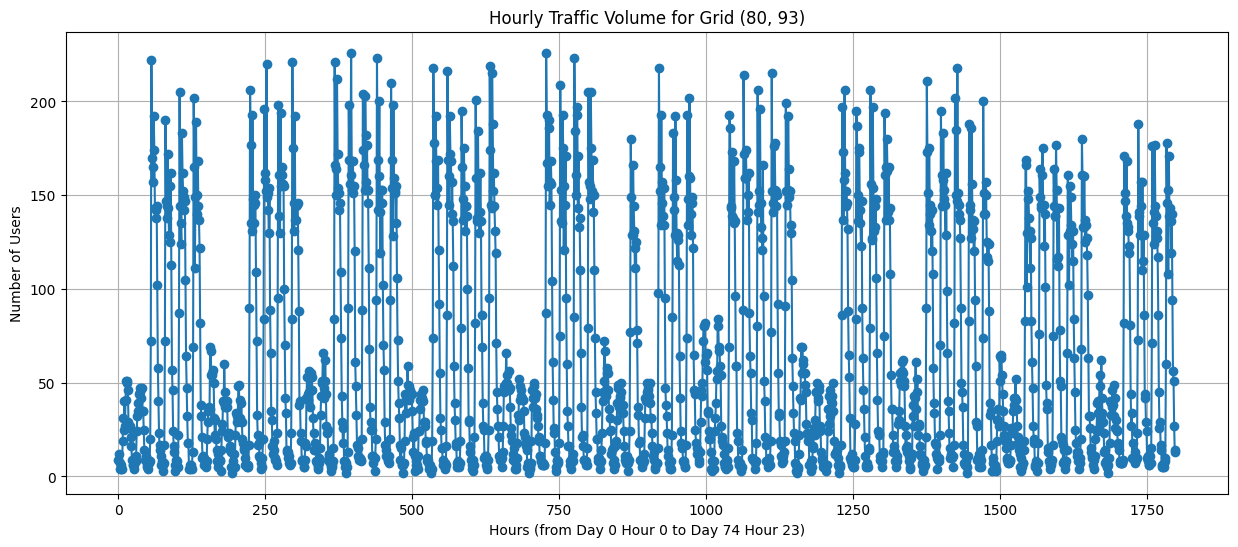

In [5]:
filtered_data = data[(data['x'] == 80) & (data['y'] == 93)]

filtered_data['hours'] = filtered_data['d'] * 24 + (filtered_data['t'] // 2)
filtered_data = filtered_data.sort_values(by='hours')

hourly_counts = filtered_data.groupby('hours').size().reset_index(name='count')
#hourly_counts.to_csv('x=80y=93.csv', index=False)

plt.figure(figsize=(15, 6))
plt.plot(hourly_counts['hours'], hourly_counts['count'], marker='o', linestyle='-')
plt.title('Hourly Traffic Volume for Grid (80, 93)')
plt.xlabel('Hours (from Day 0 Hour 0 to Day 74 Hour 23)')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()


<ipython-input-3-a9f02fb2c8dc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['weekday'] = filtered_data['d'] % 7
<ipython-input-3-a9f02fb2c8dc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hour_of_day'] = filtered_data['t']
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model 

Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 0.0758 - mae: 0.2141 - val_loss: 0.0428 - val_mae: 0.1685
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0505 - mae: 0.1807 - val_loss: 0.0199 - val_mae: 0.1120
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0303 - mae: 0.1328 - val_loss: 0.0129 - val_mae: 0.0787
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0218 - mae: 0.1055 - val_loss: 0.0153 - val_mae: 0.0928
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0209 - mae: 0.1031 - val_loss: 0.0095 - val_mae: 0.0665
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0187 - mae: 0.0949 - val_loss: 0.0093 - val_mae: 0.0703
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0179 - mae: 0.0912 - val_loss: 0.0104 - val_mae: 0.0738
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0164 - mae: 0.0863 - val_loss: 0.0095 - val_mae: 0.0700
Epoch 9/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.01

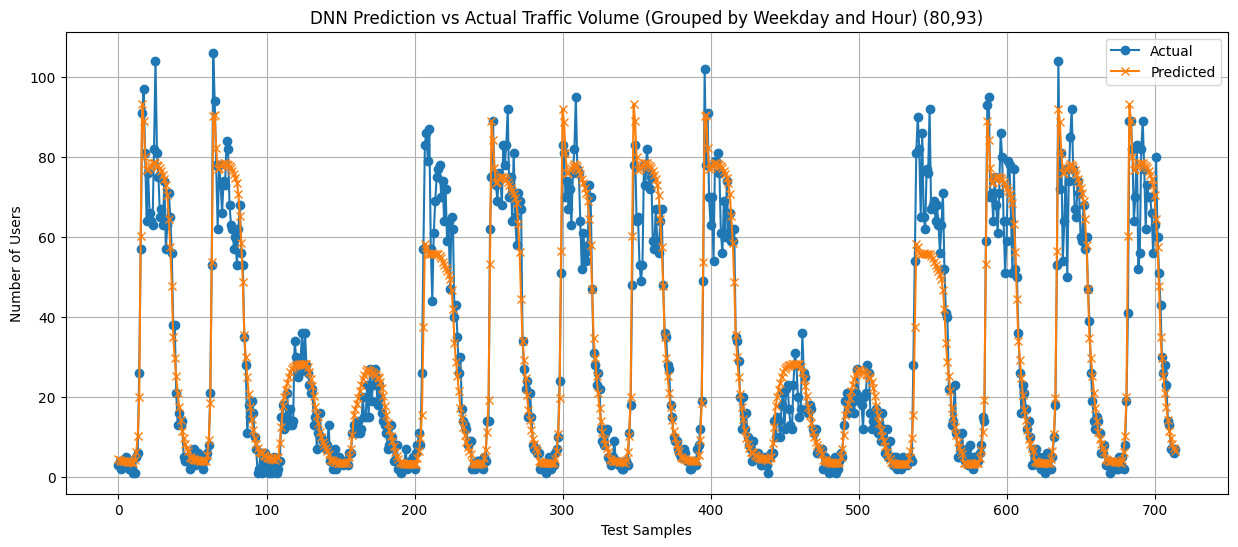

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

filtered_data = data[(data['x'] == 80) & (data['y'] == 93)]

filtered_data['weekday'] = filtered_data['d'] % 7
filtered_data['hour_of_day'] = filtered_data['t']

grouped_data = filtered_data.groupby(['d', 'weekday', 'hour_of_day']).size().reset_index(name='count')

train_data = grouped_data[grouped_data['d'] <= 59]
val_data = grouped_data[grouped_data['d'] > 59]

X_train = train_data[['weekday', 'hour_of_day']].values
y_train = train_data['count'].values.reshape(-1, 1)

X_val = val_data[['weekday', 'hour_of_day']].values
y_val = val_data['count'].values.reshape(-1, 1)

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_x.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_val_scaled = scaler_x.transform(X_val)
y_val_scaled = scaler_y.transform(y_val)

model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train_scaled, y_train_scaled,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_val_scaled, y_val_scaled))

y_pred_scaled = model.predict(X_val_scaled)
y_pred_rescaled = scaler_y.inverse_transform(y_pred_scaled)
y_val_rescaled = scaler_y.inverse_transform(y_val_scaled)

plt.figure(figsize=(15, 6))
plt.plot(y_val_rescaled, label='Actual', marker='o')
plt.plot(y_pred_rescaled, label='Predicted', marker='x')
plt.title('DNN Prediction vs Actual Traffic Volume (Grouped by Weekday and Hour) (80,93)')
plt.xlabel('Test Samples')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(True)
plt.show()


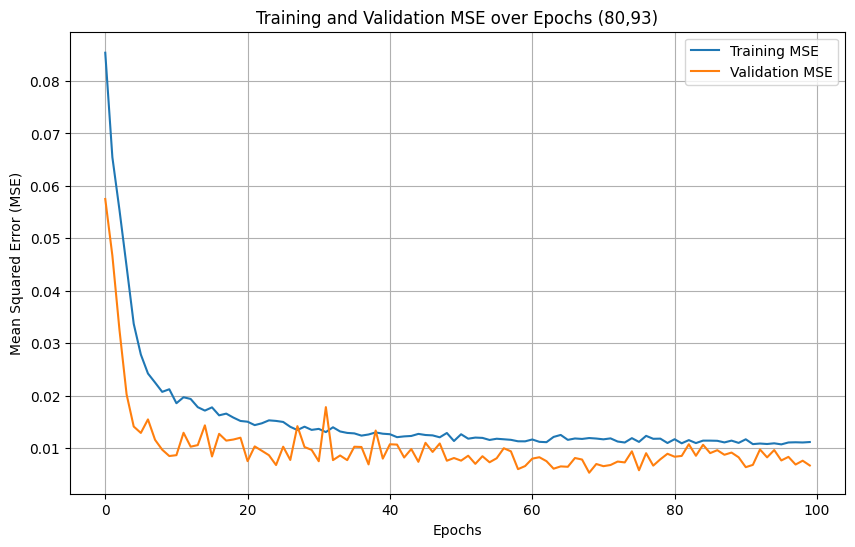

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('Training and Validation MSE over Epochs (80,93)')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

### (86,149)

<ipython-input-22-d59c6b60938d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hours'] = filtered_data['d'] * 24 + (filtered_data['t'] // 2)


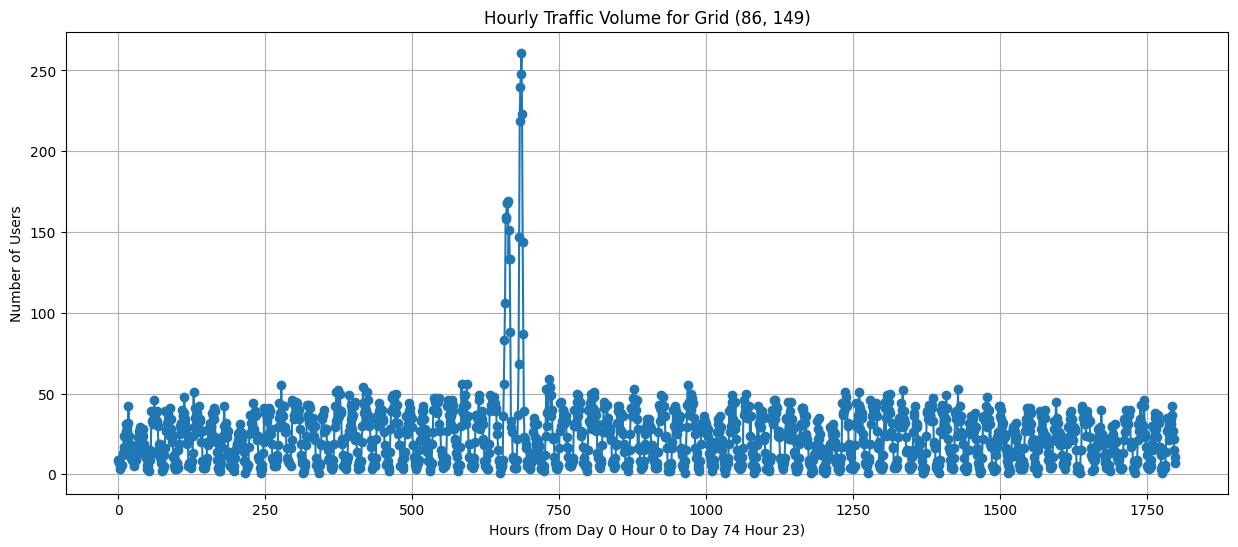

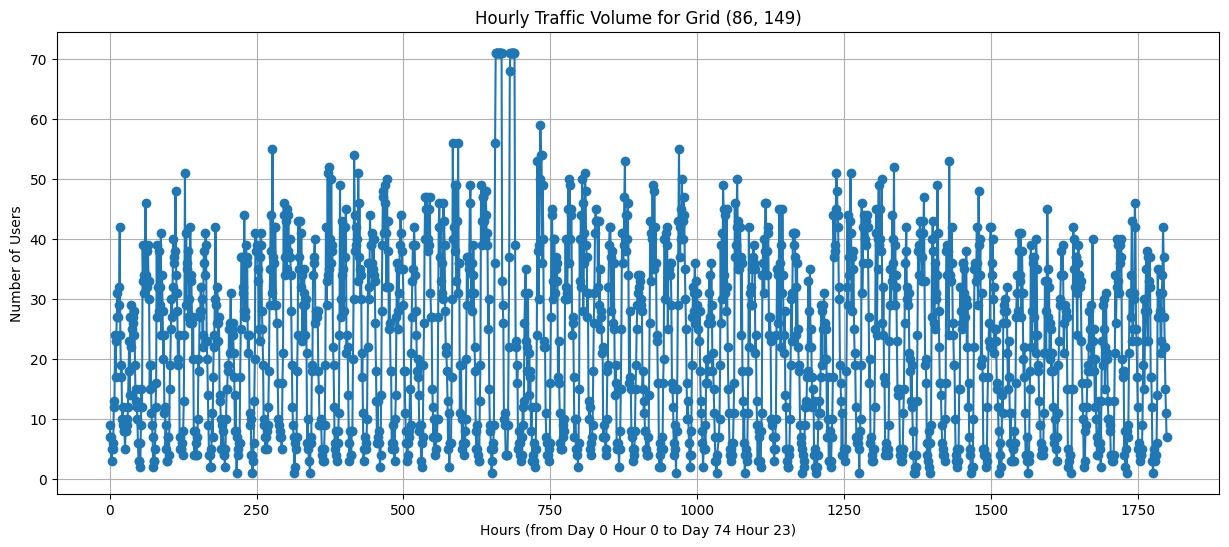

In [22]:
filtered_data = data[(data['x'] == 86) & (data['y'] == 149)]

filtered_data['hours'] = filtered_data['d'] * 24 + (filtered_data['t'] // 2)
#filtered_data.loc['hours'] = filtered_data['d'] * 24 + (filtered_data['t'] // 2)
filtered_data = filtered_data.sort_values(by='hours')

hourly_counts = filtered_data.groupby('hours').size().reset_index(name='count')
#hourly_counts.to_csv('x=86y=149.csv', index=False)

plt.figure(figsize=(15, 6))
plt.plot(hourly_counts['hours'], hourly_counts['count'], marker='o', linestyle='-')
plt.title('Hourly Traffic Volume for Grid (86, 149)')
plt.xlabel('Hours (from Day 0 Hour 0 to Day 74 Hour 23)')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

hourly_counts['count'] = np.where(hourly_counts['count'] > 70, 71, hourly_counts['count'])
plt.figure(figsize=(15, 6))
plt.plot(hourly_counts['hours'], hourly_counts['count'], marker='o', linestyle='-')
plt.title('Hourly Traffic Volume for Grid (86, 149)')
plt.xlabel('Hours (from Day 0 Hour 0 to Day 74 Hour 23)')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()


Epoch 1/100


<ipython-input-11-b887cc7d8be5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['weekday'] = filtered_data['d'] % 7  # 取模7得到星期
<ipython-input-11-b887cc7d8be5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hour_of_day'] = filtered_data['t'] // 2  # 小時
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the f

45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0095 - mae: 0.0646 - val_loss: 0.0017 - val_mae: 0.0336
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0057 - mae: 0.0469 - val_loss: 0.0016 - val_mae: 0.0332
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0070 - mae: 0.0457 - val_loss: 0.0016 - val_mae: 0.0335
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051 - mae: 0.0427 - val_loss: 9.6177e-04 - val_mae: 0.0237
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0063 - mae: 0.0397 - val_loss: 0.0012 - val_mae: 0.0269
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040 - mae: 0.0338 - val_loss: 0.0013 - val_mae: 0.0282
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047 - mae: 0.0346 - val_loss: 7.7893e-04 - val_mae: 0.0216
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0064 - mae: 0.0351 - val_loss: 0.0012 - val_mae: 0.0269
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045 -

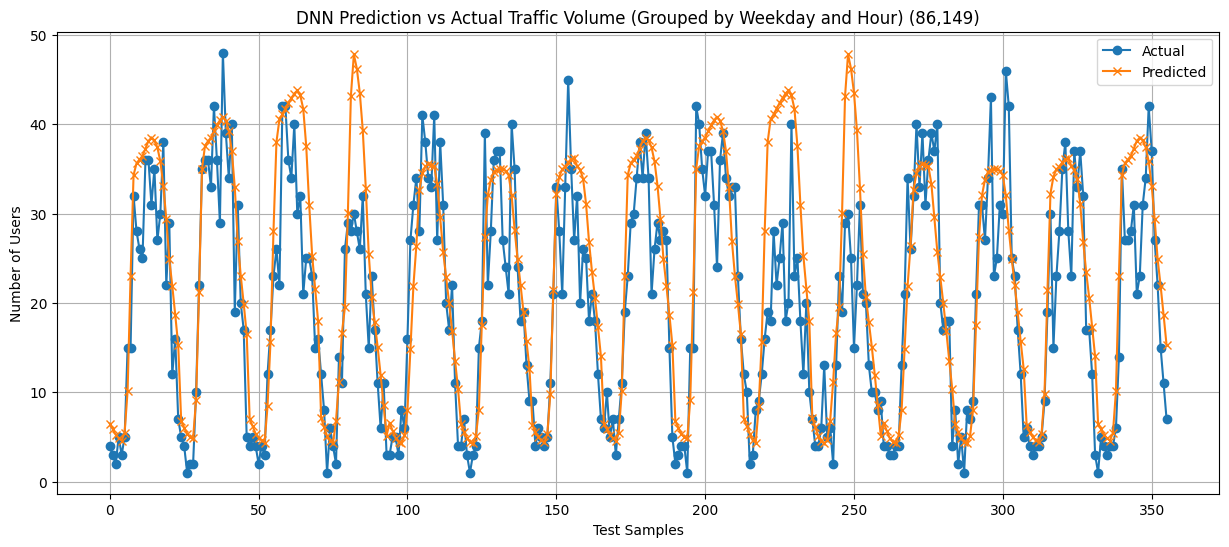

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

filtered_data = data[(data['x'] == 86) & (data['y'] == 149)]

filtered_data['weekday'] = filtered_data['d'] % 7
filtered_data['hour_of_day'] = filtered_data['t'] // 2

grouped_data = filtered_data.groupby(['d', 'weekday', 'hour_of_day']).size().reset_index(name='count')

train_data = grouped_data[grouped_data['d'] <= 59]
val_data = grouped_data[grouped_data['d'] > 59]

X_train = train_data[['weekday', 'hour_of_day']].values
y_train = train_data['count'].values.reshape(-1, 1)

X_val = val_data[['weekday', 'hour_of_day']].values
y_val = val_data['count'].values.reshape(-1, 1)

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_x.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_val_scaled = scaler_x.transform(X_val)
y_val_scaled = scaler_y.transform(y_val)

model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train_scaled, y_train_scaled,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_val_scaled, y_val_scaled))

y_pred_scaled = model.predict(X_val_scaled)
y_pred_rescaled = scaler_y.inverse_transform(y_pred_scaled)
y_val_rescaled = scaler_y.inverse_transform(y_val_scaled)

plt.figure(figsize=(15, 6))
plt.plot(y_val_rescaled, label='Actual', marker='o')
plt.plot(y_pred_rescaled, label='Predicted', marker='x')
plt.title('DNN Prediction vs Actual Traffic Volume (Grouped by Weekday and Hour) (86,149)')
plt.xlabel('Test Samples')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(True)
plt.show()


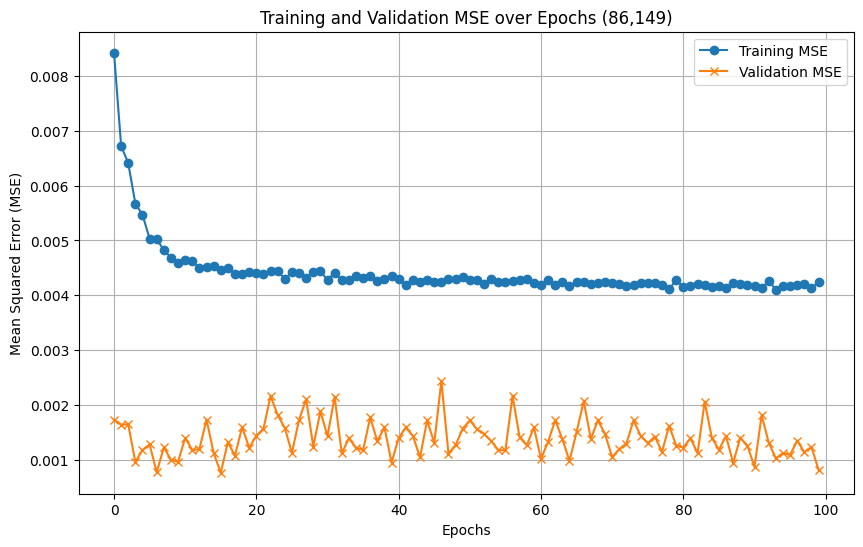

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training MSE', marker='o')
plt.plot(history.history['val_loss'], label='Validation MSE', marker='x')
plt.title('Training and Validation MSE over Epochs (86,149)')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()